# Adult Census Income

In [1]:
import pandas as pd
import zipfile
import os
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib

In [2]:
# Extract the zip file
zip_file_path = 'Adult Census Income.zip'
extract_path = 'adult_income_data'

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# Load the dataset
file_path = os.path.join(extract_path, 'adult.csv')
df = pd.read_csv(file_path)

# Display dataset information
print("Dataset Information:")
print(df.info())
print("\nFirst few rows:")
print(df.head())


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB
None

First few rows:
   age workclass  fnlwgt     education  education.

In [3]:
# Inspect and Clean the Dataset

# Check for missing values
print("\nMissing Values Before Cleanup:")
print(df.isnull().sum())

# Check unique values in each column
for col in df.columns:
    print(f"\nUnique values in '{col}': {df[col].unique()}")

# Replace '?' with NaN for missing value handling
df.replace('?', pd.NA, inplace=True)

# Drop rows with missing values
print(f"\nNumber of rows before dropping missing values: {len(df)}")
df.dropna(inplace=True)
print(f"Number of rows after dropping missing values: {len(df)}")

# Display dataset information after cleaning
print("\nDataset after handling missing values:")
print(df.info())



Missing Values Before Cleanup:
age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

Unique values in 'age': [90 82 66 54 41 34 38 74 68 45 52 32 51 46 57 22 37 29 61 21 33 49 23 59
 60 63 53 44 43 71 48 73 67 40 50 42 39 55 47 31 58 62 36 72 78 83 26 70
 27 35 81 65 25 28 56 69 20 30 24 64 75 19 77 80 18 17 76 79 88 84 85 86
 87]

Unique values in 'workclass': ['?' 'Private' 'State-gov' 'Federal-gov' 'Self-emp-not-inc' 'Self-emp-inc'
 'Local-gov' 'Without-pay' 'Never-worked']

Unique values in 'fnlwgt': [ 77053 132870 186061 ...  34066  84661 257302]

Unique values in 'education': ['HS-grad' 'Some-college' '7th-8th' '10th' 'Doctorate' 'Prof-school'
 'Bachelors' 'Masters' '11th' 'Assoc-acdm' 'Assoc-voc' '1st-4th' '5th-6th'
 '12th

In [5]:
# Perform One-Hot Encoding and Normalization

# Identify categorical and numerical columns
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("\nCategorical Columns:", categorical_columns)
print("\nNumerical Columns:", numerical_columns)

# One-hot encode categorical columns (excluding the target column)
encoder = OneHotEncoder(drop='first', sparse_output=False)  # Use 'sparse_output' for newer versions
categorical_encoded = encoder.fit_transform(df[categorical_columns[:-1]])  # Exclude target column
categorical_encoded_df = pd.DataFrame(categorical_encoded, columns=encoder.get_feature_names_out(categorical_columns[:-1]))

# Normalize numerical columns
scaler = StandardScaler()
numerical_scaled = scaler.fit_transform(df[numerical_columns])
numerical_scaled_df = pd.DataFrame(numerical_scaled, columns=numerical_columns)

# Combine preprocessed data
X = pd.concat([numerical_scaled_df, categorical_encoded_df], axis=1)
y = df['income'].map({'<=50K': 0, '>50K': 1})  # Map target to binary values

print("\nFeatures (X) shape:", X.shape)
print("Target (y) shape:", y.shape)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\nTraining and Testing sets created.")
print(f"Training set size: {X_train.shape[0]} rows")
print(f"Testing set size: {X_test.shape[0]} rows")


Categorical Columns: ['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country', 'income']

Numerical Columns: ['age', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss', 'hours.per.week']

Features (X) shape: (30162, 96)
Target (y) shape: (30162,)

Training and Testing sets created.
Training set size: 24129 rows
Testing set size: 6033 rows


In [ ]:
# Split the Data into Training and Testing Sets

# Encode target labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

print("\nTraining and Testing sets created.")
print(f"Training set size: {X_train.shape[0]} rows")
print(f"Testing set size: {X_test.shape[0]} rows")



Logistic Regression Model Accuracy: 0.8420

Classification Report:
              precision    recall  f1-score   support

       <=50K       0.87      0.92      0.90      4533
        >50K       0.72      0.60      0.65      1500

    accuracy                           0.84      6033
   macro avg       0.80      0.76      0.78      6033
weighted avg       0.84      0.84      0.84      6033



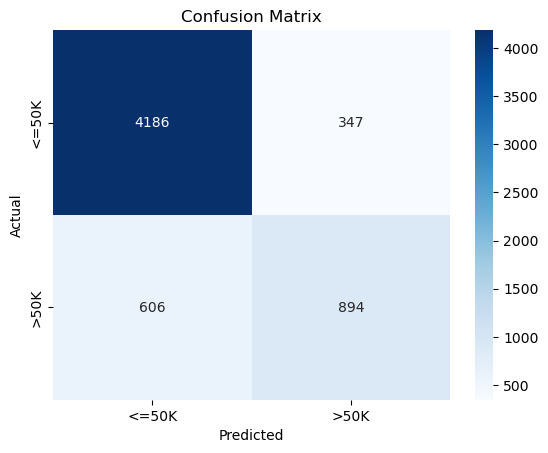

In [7]:
# Train and Evaluate a Logistic Regression Model

# Initialize the Logistic Regression model
model = LogisticRegression(max_iter=1000, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"\nLogistic Regression Model Accuracy: {accuracy:.4f}")

# Use the unique target values directly for the classification report
target_names = ['<=50K', '>50K']

# Detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=target_names))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=target_names, 
            yticklabels=target_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


Random Forest Model Accuracy: 0.8424

Random Forest Classification Report:
              precision    recall  f1-score   support

       <=50K       0.88      0.92      0.90      4533
        >50K       0.72      0.61      0.66      1500

    accuracy                           0.84      6033
   macro avg       0.80      0.76      0.78      6033
weighted avg       0.84      0.84      0.84      6033



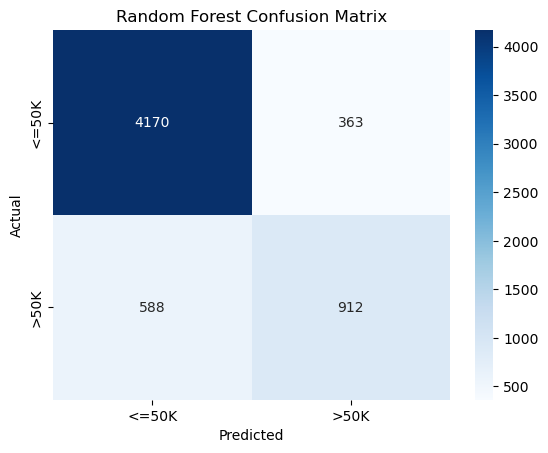

In [8]:
# Train and Evaluate a Random Forest Model

# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
rf_y_pred = rf_model.predict(X_test)

# Evaluate the model
rf_accuracy = accuracy_score(y_test, rf_y_pred)
print(f"\nRandom Forest Model Accuracy: {rf_accuracy:.4f}")

# Use the actual target names for the classification report
target_names = ['<=50K', '>50K']

# Detailed classification report
print("\nRandom Forest Classification Report:")
print(classification_report(y_test, rf_y_pred, target_names=target_names))

# Confusion Matrix
rf_conf_matrix = confusion_matrix(y_test, rf_y_pred)
sns.heatmap(rf_conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=target_names, 
            yticklabels=target_names)
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [9]:
# Save the Trained Model

# Save the trained Random Forest model
joblib.dump(rf_model, 'adult_income_rf_model.pkl')

# To load the model later:
# loaded_model = joblib.load('adult_income_rf_model.pkl')


['adult_income_rf_model.pkl']